# Exploratory Notebook

In [121]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm


%matplotlib inline

## DATA DISCOVERY

- Connecting to im.db

In [19]:
#Connecting the im.db SQL database

conn = sqlite3.connect('../Data/im.db')

In [20]:
# Reading table movie_basic 
df_mb = pd.read_sql("""

SELECT *
FROM movie_basics

""", conn)

df_mb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [21]:
df_mb.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [22]:
df_mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [23]:
df_mb['genres'].isna().sum()

5408

In [24]:
df_mb['runtime_minutes'].isna().sum()

31739

In [25]:
# DATA cleanning, we want to unify the database by dropping Null value from all columns
columns_to_drop_na = ['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres']
df_mb.dropna(subset=columns_to_drop_na, inplace=True)


In [26]:
#Verification
df_mb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
df_mb['genres'].isna().sum()

0

In [28]:
df_mb['runtime_minutes'].isna().sum()

0

#Data cleaning : Let's cleann the genres column
df_mb['genres'] = df_mb['genres'].str.split(',') 
df_mb = df_mb[df_mb['genres'].notnull()]
df_mb = df_mb.explode('genres')
df_mb.to_sql('cleaned_movies', conn, if_exists='replace')
df_mb

df_mb = df_mb[df_mb['genres'].notnull()]


df_mb = df_mb.explode('genres')


df_mb.to_sql('cleaned_movies', conn, if_exists='replace')
df_mb

## Movie_Ratings table

In [29]:
#Reading movie_ratings

df_mr = pd.read_sql("""

SELECT *
FROM movie_ratings

""", conn)

df_mr

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [30]:
df_mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Movie_akas table

In [31]:
#Reading movie_ratings
df_ma = pd.read_sql("""

SELECT *
FROM movie_akas

""", conn)

df_ma

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [32]:
df_ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [33]:
df_ma.columns

Index(['movie_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')

In [34]:
#Data cleanning
columns_to_drop_na = ['region', 'language', 'types' ]
df_ma.dropna(subset=columns_to_drop_na, inplace=True)

In [35]:
df_ma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31069 entries, 8 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           31069 non-null  object 
 1   ordering           31069 non-null  int64  
 2   title              31069 non-null  object 
 3   region             31069 non-null  object 
 4   language           31069 non-null  object 
 5   types              31069 non-null  object 
 6   attributes         0 non-null      object 
 7   is_original_title  31069 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 2.1+ MB


df_5a = pd.read_sql("""

SELECT *, MAX (averagerating) AS av_rating , MAX(numvotes) AS num_votes
FROM movie_basics
    JOIN movie_ratings 
       USING(movie_id)
    JOIN movie_akas ma
        USING(movie_id)
    GROUP BY movie_id
    ORDER BY num_votes DESC;

""", conn)

df_5a.head(10)

In [36]:
#Joining MOVIE RATING, BASICS, AKAS INTO df_m
df_m = pd.read_sql("""

SELECT movie_id, primary_title, runtime_minutes, genres, region, language, MAX (averagerating) AS av_rating , MAX(numvotes) AS num_votes
FROM movie_basics
    JOIN movie_ratings 
       USING(movie_id)
    JOIN movie_akas ma
        USING(movie_id)
    GROUP BY movie_id
    ORDER BY num_votes DESC;



""", conn)
df_m

,movie_id,primary_title,runtime_minutes,genres,region,language,av_rating,num_votes
0,tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",None,None,8.8,1841066
1,tt1345836,The Dark Knight Rises,164.0,"Action,Thriller",None,None,8.4,1387769
2,tt0816692,Interstellar,169.0,"Adventure,Drama,Sci-Fi",None,None,8.6,1299334
3,tt1853728,Django Unchained,165.0,"Drama,Western",None,None,8.4,1211405
4,tt0848228,The Avengers,143.0,"Action,Adventure,Sci-Fi",None,None,8.1,1183655
...,...,...,...,...,...,...,...,...
69572,tt10043732,Oblepikhovoe leto,87.0,"Biography,Drama",None,None,6.4,5
69573,tt10011772,Balloons over Babylon,70.0,Documentary,None,None,8.2,5
69574,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,52.0,Documentary,None,None,7.0,5
69575,tt0844699,Ivan Mosjoukine ou L'enfant du carnaval,67.0,Documentary,FR,None,9.0,5


In [37]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69577 entries, 0 to 69576
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         69577 non-null  object 
 1   primary_title    69577 non-null  object 
 2   runtime_minutes  62830 non-null  float64
 3   genres           68937 non-null  object 
 4   region           32697 non-null  object 
 5   language         0 non-null      object 
 6   av_rating        69577 non-null  float64
 7   num_votes        69577 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 4.2+ MB


In [38]:
#more Data cleanning
columns_to_drop_na = ['runtime_minutes']
df_m.dropna(subset=columns_to_drop_na, inplace=True)

In [39]:
df_m

,movie_id,primary_title,runtime_minutes,genres,region,language,av_rating,num_votes
0,tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",None,None,8.8,1841066
1,tt1345836,The Dark Knight Rises,164.0,"Action,Thriller",None,None,8.4,1387769
2,tt0816692,Interstellar,169.0,"Adventure,Drama,Sci-Fi",None,None,8.6,1299334
3,tt1853728,Django Unchained,165.0,"Drama,Western",None,None,8.4,1211405
4,tt0848228,The Avengers,143.0,"Action,Adventure,Sci-Fi",None,None,8.1,1183655
...,...,...,...,...,...,...,...,...
69572,tt10043732,Oblepikhovoe leto,87.0,"Biography,Drama",None,None,6.4,5
69573,tt10011772,Balloons over Babylon,70.0,Documentary,None,None,8.2,5
69574,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,52.0,Documentary,None,None,7.0,5
69575,tt0844699,Ivan Mosjoukine ou L'enfant du carnaval,67.0,Documentary,FR,None,9.0,5


In [40]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62830 entries, 0 to 69576
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         62830 non-null  object 
 1   primary_title    62830 non-null  object 
 2   runtime_minutes  62830 non-null  float64
 3   genres           62391 non-null  object 
 4   region           27861 non-null  object 
 5   language         0 non-null      object 
 6   av_rating        62830 non-null  float64
 7   num_votes        62830 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 4.3+ MB


In [41]:
#Data cleaning : Let's cleann the genres column
df_m['genres'] = df_m['genres'].str.split(',') 


In [42]:
df_m = df_m[df_m['genres'].notnull()]


In [43]:
df_m = df_m.explode('genres')


In [44]:
#df_m.to_sql('cleaned_movies', conn, if_exists='replace')
df_m

,movie_id,primary_title,runtime_minutes,genres,region,language,av_rating,num_votes
0,tt1375666,Inception,148.0,Action,None,None,8.8,1841066
0,tt1375666,Inception,148.0,Adventure,None,None,8.8,1841066
0,tt1375666,Inception,148.0,Sci-Fi,None,None,8.8,1841066
1,tt1345836,The Dark Knight Rises,164.0,Action,None,None,8.4,1387769
1,tt1345836,The Dark Knight Rises,164.0,Thriller,None,None,8.4,1387769
...,...,...,...,...,...,...,...,...
69573,tt10011772,Balloons over Babylon,70.0,Documentary,None,None,8.2,5
69574,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,52.0,Documentary,None,None,7.0,5
69575,tt0844699,Ivan Mosjoukine ou L'enfant du carnaval,67.0,Documentary,FR,None,9.0,5
69576,tt0276568,To Chase a Million,97.0,Action,GB,None,7.4,5


In [45]:
df_m['w_avg'] = ((df_m['av_rating']*df_m['num_votes'])/ sum(df_m['num_votes']))*100
df_m.head(20)

,movie_id,primary_title,runtime_minutes,genres,region,language,av_rating,num_votes,w_avg
0,tt1375666,Inception,148.0,Action,None,None,8.8,1841066,2.365517
0,tt1375666,Inception,148.0,Adventure,None,None,8.8,1841066,2.365517
0,tt1375666,Inception,148.0,Sci-Fi,None,None,8.8,1841066,2.365517
1,tt1345836,The Dark Knight Rises,164.0,Action,None,None,8.4,1387769,1.702043
1,tt1345836,The Dark Knight Rises,164.0,Thriller,None,None,8.4,1387769,1.702043
2,tt0816692,Interstellar,169.0,Adventure,None,None,8.6,1299334,1.631524
2,tt0816692,Interstellar,169.0,Drama,None,None,8.6,1299334,1.631524
2,tt0816692,Interstellar,169.0,Sci-Fi,None,None,8.6,1299334,1.631524
3,tt1853728,Django Unchained,165.0,Drama,None,None,8.4,1211405,1.485740
3,tt1853728,Django Unchained,165.0,Western,None,None,8.4,1211405,1.485740


In [46]:
#df_m.to_csv('movie_clean-a.csv')

<ipython-input-123-ee54db461a20>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_m['genres'].index, rotation=45, ha='right')


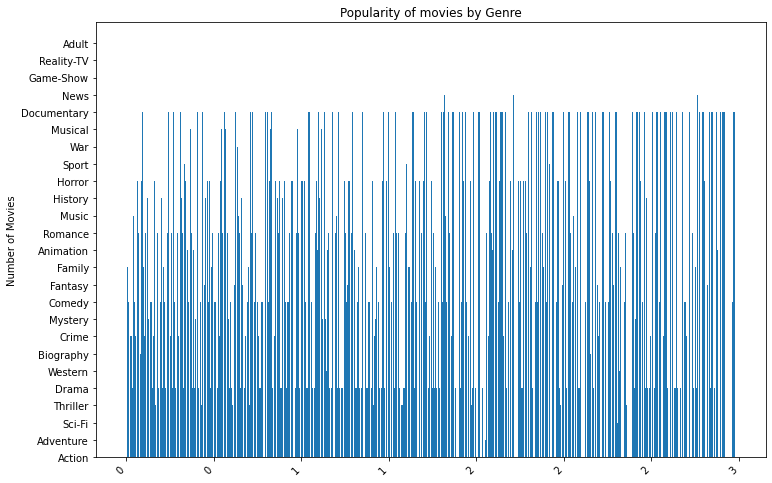

In [123]:

# bar chart 
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df_m['genres'].index, df_m['genres'].values)
ax.set_ylabel('Number of Movies')
ax.set_title('Popularity of movies by Genre')
ax.set_xticklabels(df_m['genres'].index, rotation=45, ha='right')

# show plot
plt.show();

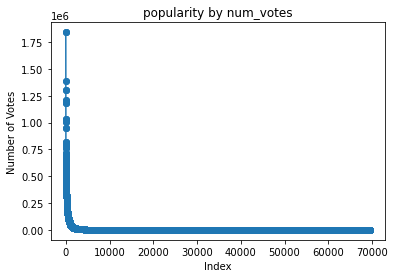

In [47]:
import matplotlib.pyplot as plt


# Plot the 'num_votes' column
plt.plot(df_m['num_votes'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Number of Votes')
plt.title('popularity by num_votes')

# Show the plot
plt.show()


## Reading Bom.movies database

In [48]:
df_mg = pd.read_csv('../Data/bom.movie_gross.csv.gz')

In [49]:
df_mg

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [50]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [51]:
df_mg.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [52]:
df_mg.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [53]:
columns_to_drop_na = ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
df_mg.dropna(subset=columns_to_drop_na, inplace=True)
df_mg.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [54]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [55]:
df_mg

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [56]:
df_mg['domestic_gross'] = pd.to_numeric(df_mg['domestic_gross'], errors='coerce').fillna(0).astype(int)
df_mg['foreign_gross'] = pd.to_numeric(df_mg['foreign_gross'], errors='coerce').fillna(0).astype(int)

In [57]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2007 non-null   int64 
 3   foreign_gross   2007 non-null   int64 
 4   year            2007 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 94.1+ KB


In [58]:
df_mg['total_gross'] = df_mg['domestic_gross'] + df_mg['foreign_gross']

In [59]:
df_gross= df_mg.head(20)

In [60]:
df_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000
5,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010,698500000
6,Iron Man 2,Par.,312400000,311500000,2010,623900000
7,Tangled,BV,200800000,391000000,2010,591800000
8,Despicable Me,Uni.,251500000,291600000,2010,543100000
9,How to Train Your Dragon,P/DW,217600000,277300000,2010,494900000


In [61]:
#df_gross.to_csv('movie_gross.csv')

## Reading the rt.reviews 

In [62]:
df_rt = pd.read_csv('../Data/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')

In [63]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [64]:
df_rt

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [65]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [66]:
df_rt.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [67]:
columns_to_drop_na = ['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date']
df_rt.dropna(subset=columns_to_drop_na, inplace=True)


In [68]:
df_rt.shape

(33988, 8)

In [69]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [70]:
df_rt['top_critic'].unique()

array([0, 1])

In [71]:
df_rt = df_rt[df_rt['top_critic'] >= 1]

In [72]:
df_rt

,id,review,rating,fresh,critic,top_critic,publisher,date
24,3,"The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1,St. Louis Post-Dispatch,"September 6, 2012"
47,3,It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1,Washington Post,"August 24, 2012"
50,3,"There's not really a movie there, nothing that...",2/4,rotten,Mick LaSalle,1,San Francisco Chronicle,"August 23, 2012"
54,3,The film is all too faithful to its un-cinemat...,1.5/4,rotten,Colin Covert,1,Minneapolis Star Tribune,"August 23, 2012"
55,3,"Cosmopolis,"" because of its allegiance to the ...",2/4,rotten,Moira MacDonald,1,Seattle Times,"August 23, 2012"
...,...,...,...,...,...,...,...,...
54410,2000,"A silly, cross-cultural shoot-'em-up -- the so...",2/4,fresh,Jonathan Curiel,1,San Francisco Chronicle,"October 4, 2002"
54411,2000,Don't let the subtitles fool you; the movie on...,2/4,rotten,John Monaghan,1,Detroit Free Press,"October 4, 2002"
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"


In [73]:
df_rt['top_critic'].value_counts

<bound method IndexOpsMixin.value_counts of 24       1
47       1
50       1
54       1
55       1
        ..
54410    1
54411    1
54419    1
54420    1
54424    1
Name: top_critic, Length: 7177, dtype: int64>

In [74]:
df_rt['rating'].value_counts()

3/4       1222
2/4        953
2.5/4      788
3.5/4      557
1.5/4      332
          ... 
0/6          1
6.8/10       1
7.2/10       1
1/10         1
5/10         1
Name: rating, Length: 65, dtype: int64

In [75]:
# Convert 'rating' column to numeric values, coerce non-numeric values to NaN
#df_rt.loc[:, 'rating'] = pd.to_numeric(df_rt['rating'], errors='coerce')

# Drop rows where 'rating' is not numeric
#df_rt = df_rt.dropna(subset=['rating'])


In [76]:
df_rt['rating']

24       2.5/4
47         2/4
50         2/4
54       1.5/4
55         2/4
         ...  
54410      2/4
54411      2/4
54419    2.5/4
54420      3/4
54424    1.5/5
Name: rating, Length: 7177, dtype: object

In [77]:
df_rt[df_rt.duplicated()]

,id,review,rating,fresh,critic,top_critic,publisher,date


## Reading Rotten tomatos movies



In [78]:
df_rtr = pd.read_csv('../Data/rt.movie_info.tsv.gz', sep='\t' )
df_rtr

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [79]:
df_rtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## Reading the numbers

In [80]:
df_n = pd.read_csv('../Data/tn.movie_budgets.csv.gz')

In [81]:
df_n

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [82]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [83]:
# converting the object columns into integer
#roi_df['production_budget'] = pd.to_numeric(roi_df['production_budget'].str.replace('[\$,]', '', regex=True), errors='coerce')

df_n['production_budget'] = pd.to_numeric(df_n['production_budget'].str.replace('[\$,]', '', regex=True), errors='coerce')


In [84]:
df_n['worldwide_gross'] = pd.to_numeric(df_n['worldwide_gross'].str.replace('[\$,]', '', regex=True), errors='coerce')

In [85]:
df_n['domestic_gross'] = pd.to_numeric(df_n['domestic_gross'].str.replace('[\$,]', '', regex=True), errors='coerce')


In [86]:
df_n

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [87]:
#convert dates into datetime type

df_n['release_date'] = pd.to_datetime(df_n['release_date'], errors='coerce')

In [88]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [89]:
#ROI calculation
df_n['ROI'] = (((df_n['worldwide_gross'] - df_n['production_budget']) / df_n['production_budget']) * 100).apply('{:.2f}%'.format)

In [90]:
df_n

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.26%
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.67%
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.21%
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.38%
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.37%
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-100.00%
5778,79,1999-04-02,Following,6000,48482,240495,3908.25%
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-73.24%
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-100.00%


In [91]:
#
df_clean = pd.read_csv('../Data/movie_clean.csv')

In [92]:
df_clean

,Unnamed: 0,primary_title,runtime_minutes,genres,averagerating,numvotes,production_budget,worldwide_gross,year,ROI
0,0,The Gallows,81.0,"['Horror', 'Mystery', 'Thriller']",4.2,17763.0,100000.0,41656474.0,2015.0,41556.474000
1,1,The Devil Inside,83.0,['Horror'],4.2,33522.0,1000000.0,101759490.0,2012.0,10075.949000
2,2,Paranormal Activity 2,91.0,['Horror'],5.7,93122.0,3000000.0,177512032.0,2010.0,5817.067733
3,3,Get Out,104.0,"['Horror', 'Mystery', 'Thriller']",7.7,400474.0,5000000.0,255367951.0,2017.0,5007.359020
4,4,Moonlight,111.0,['Drama'],7.4,227964.0,1500000.0,65245512.0,2016.0,4249.700800
...,...,...,...,...,...,...,...,...,...,...
1485,1485,Close Range,80.0,"['Action', 'Crime']",5.0,3974.0,3000000.0,0.0,2015.0,-100.000000
1486,1486,#Horror,101.0,"['Crime', 'Drama', 'Horror']",3.0,3092.0,1500000.0,0.0,2015.0,-100.000000
1487,1487,Dwegons and Leprechauns,98.0,['Animation'],4.2,84.0,20000000.0,0.0,2014.0,-100.000000
1488,1488,Unnatural,89.0,"['Action', 'Horror', 'Sci-Fi']",4.0,1590.0,3000000.0,0.0,2015.0,-100.000000


In [93]:
df_clean

,Unnamed: 0,primary_title,runtime_minutes,genres,averagerating,numvotes,production_budget,worldwide_gross,year,ROI
0,0,The Gallows,81.0,"['Horror', 'Mystery', 'Thriller']",4.2,17763.0,100000.0,41656474.0,2015.0,41556.474000
1,1,The Devil Inside,83.0,['Horror'],4.2,33522.0,1000000.0,101759490.0,2012.0,10075.949000
2,2,Paranormal Activity 2,91.0,['Horror'],5.7,93122.0,3000000.0,177512032.0,2010.0,5817.067733
3,3,Get Out,104.0,"['Horror', 'Mystery', 'Thriller']",7.7,400474.0,5000000.0,255367951.0,2017.0,5007.359020
4,4,Moonlight,111.0,['Drama'],7.4,227964.0,1500000.0,65245512.0,2016.0,4249.700800
...,...,...,...,...,...,...,...,...,...,...
1485,1485,Close Range,80.0,"['Action', 'Crime']",5.0,3974.0,3000000.0,0.0,2015.0,-100.000000
1486,1486,#Horror,101.0,"['Crime', 'Drama', 'Horror']",3.0,3092.0,1500000.0,0.0,2015.0,-100.000000
1487,1487,Dwegons and Leprechauns,98.0,['Animation'],4.2,84.0,20000000.0,0.0,2014.0,-100.000000
1488,1488,Unnatural,89.0,"['Action', 'Horror', 'Sci-Fi']",4.0,1590.0,3000000.0,0.0,2015.0,-100.000000


In [99]:
df_clean['genres'] = df_clean['genres'].str.split(',')


In [100]:
df_clean = df_clean[df_clean['genres'].notnull()]

In [101]:
df_clean = df_clean.explode('genres')

In [105]:
df_clean['genres'] = df_clean['genres'].str.replace(r"\[|\]|\(|\)", '').str.extract(r"'(.*?)'")

In [106]:
#df_clean.to_sql('cleaned_movies', conn, if_exists='replace')

In [115]:
df_clean

,Unnamed: 0,primary_title,runtime_minutes,genres,averagerating,numvotes,production_budget,worldwide_gross,year,ROI,budget_type
0,0,The Gallows,81.0,Horror,4.2,17763.0,100000.0,41656474.0,2015.0,41556.474000,Ultra-Low
0,0,The Gallows,81.0,Mystery,4.2,17763.0,100000.0,41656474.0,2015.0,41556.474000,Ultra-Low
0,0,The Gallows,81.0,Thriller,4.2,17763.0,100000.0,41656474.0,2015.0,41556.474000,Ultra-Low
1,1,The Devil Inside,83.0,Horror,4.2,33522.0,1000000.0,101759490.0,2012.0,10075.949000,Low Theatrical Budget
2,2,Paranormal Activity 2,91.0,Horror,5.7,93122.0,3000000.0,177512032.0,2010.0,5817.067733,Theatrical
...,...,...,...,...,...,...,...,...,...,...,...
1488,1488,Unnatural,89.0,Action,4.0,1590.0,3000000.0,0.0,2015.0,-100.000000,Theatrical
1488,1488,Unnatural,89.0,Horror,4.0,1590.0,3000000.0,0.0,2015.0,-100.000000,Theatrical
1488,1488,Unnatural,89.0,Sci-Fi,4.0,1590.0,3000000.0,0.0,2015.0,-100.000000,Theatrical
1489,1489,Zipper,112.0,Drama,5.8,6120.0,4500000.0,0.0,2015.0,-100.000000,Theatrical


In [109]:
#df_clean.to_csv('df_clean.csv')

In [113]:

# Group by 'genres' and calculate the average ROI for each genre
#genre_group = df_clean_exploded_genres.groupby('genres')['ROI']

# We'll use ANOVA if we have more than 3
#f_val, p_val = stats.f_oneway(*[group for name, group in genre_group])

#anova_results = (f_val, p_val)

# Let's see the result
#anova_results

NameError: name 'df_clean_exploded_genres' is not defined

In [116]:
import numpy as np
conditions = [
    (df_clean['production_budget'] <= 35000),
    ((df_clean['production_budget'] > 35000) & (df_clean['production_budget'] <= 50000)),
    ((df_clean['production_budget'] > 50000) & (df_clean['production_budget'] <= 300000)),
    ((df_clean['production_budget'] > 300000) & (df_clean['production_budget'] <= 700000)),
    ((df_clean['production_budget'] > 700000) & (df_clean['production_budget'] <= 2000000)),
    (df_clean['production_budget'] > 2000000)
]

choices = ['Student film', 'Short project', 'Ultra-Low', 'MLB', 'Low Theatrical Budget', 'Theatrical']

df_clean['budget_type'] = np.select(conditions, choices, default='Unknown')

# Print 
df_clean.head()

,Unnamed: 0,primary_title,runtime_minutes,genres,averagerating,numvotes,production_budget,worldwide_gross,year,ROI,budget_type
0,0,The Gallows,81.0,Horror,4.2,17763.0,100000.0,41656474.0,2015.0,41556.474000,Ultra-Low
0,0,The Gallows,81.0,Mystery,4.2,17763.0,100000.0,41656474.0,2015.0,41556.474000,Ultra-Low
0,0,The Gallows,81.0,Thriller,4.2,17763.0,100000.0,41656474.0,2015.0,41556.474000,Ultra-Low
1,1,The Devil Inside,83.0,Horror,4.2,33522.0,1000000.0,101759490.0,2012.0,10075.949000,Low Theatrical Budget
2,2,Paranormal Activity 2,91.0,Horror,5.7,93122.0,3000000.0,177512032.0,2010.0,5817.067733,Theatrical


In [118]:

from sklearn.linear_model import LinearRegression

X = df_clean[['production_budget']]
y = df_clean['ROI']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# R-squared
r_squared = model.score(X, y)

print(f"R-squared: {r_squared}")

R-squared: 0.001313499480864233


In [119]:
# Filter for films with runtime less than 90 minutes
films_under_90 = df_clean[df_clean['runtime_minutes']]

# Sort the filtered films by 'ROI' in descending order
top_roi_films_under_90 = films_under_90.sort_values(by='ROI', ascending=False).head(10)

# Plot the top 10 films with the highest ROI that are less than 90 minutes
plt.figure(figsize=(12, 8))
plt.barh(top_roi_films_under_90['primary_title'], top_roi_films_under_90['ROI'], color='darkseagreen')
plt.title('Top 10 Films with the Highest ROI (< 90 minutes)')
plt.xlabel('Return on Investment (ROI)')
plt.gca().invert_yaxis()  # to have the highest ROI on top
plt.show()

KeyError: "None of [Float64Index([ 81.0,  81.0,  81.0,  83.0,  91.0, 104.0, 104.0, 104.0, 111.0,\n               86.0,\n              ...\n               80.0, 101.0, 101.0, 101.0,  98.0,  89.0,  89.0,  89.0, 112.0,\n              112.0],\n             dtype='float64', length=3800)] are in the [columns]"

In [ ]:
popularity x genre 

